<a href="https://colab.research.google.com/github/Yuzerzef/Analysis-Telecom-Customer-Churn/blob/main/telecom_customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis: Telecom Customer Churn

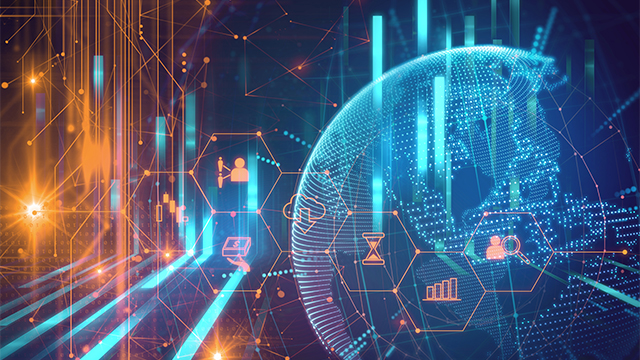



In [16]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import matplotlib.pyplot as plt
import seaborn as sns 
import hvplot.pandas


In [3]:
df=pd.read_csv('/content/telecom_customer_churn.csv')

In [4]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
df.shape

(7043, 38)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [15]:
null=df.isnull().sum()
df_null=pd.DataFrame({'Null':null})
df_null.head(37)

,Null
Customer ID,0
Gender,0
Age,0
Married,0
Number of Dependents,0
City,0
Zip Code,0
Latitude,0
Longitude,0
Number of Referrals,0


In [23]:
df['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

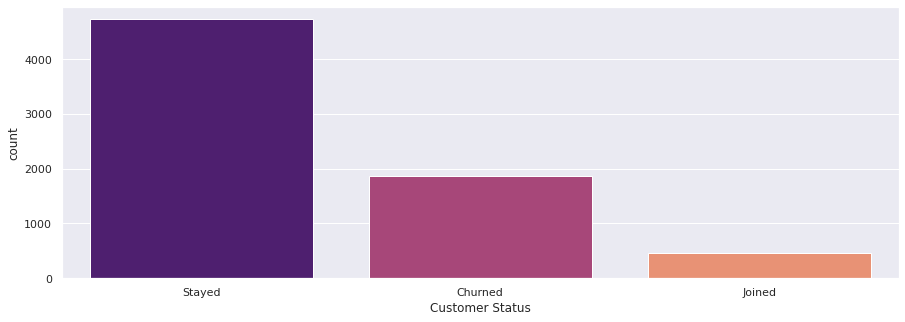

In [41]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 5))
sns.countplot(x=df['Customer Status'],  palette="magma")

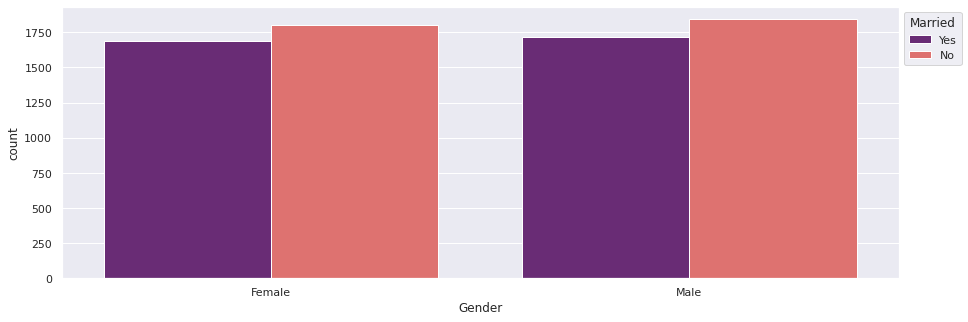

In [34]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 5))
ax=sns.countplot(x='Gender', data=df, hue='Married' , palette="magma")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

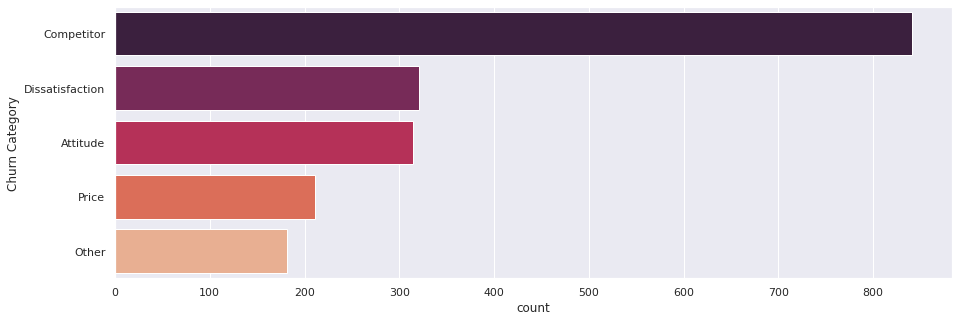

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(y=df['Churn Category'], palette="rocket",order=df['Churn Category'].value_counts().index )

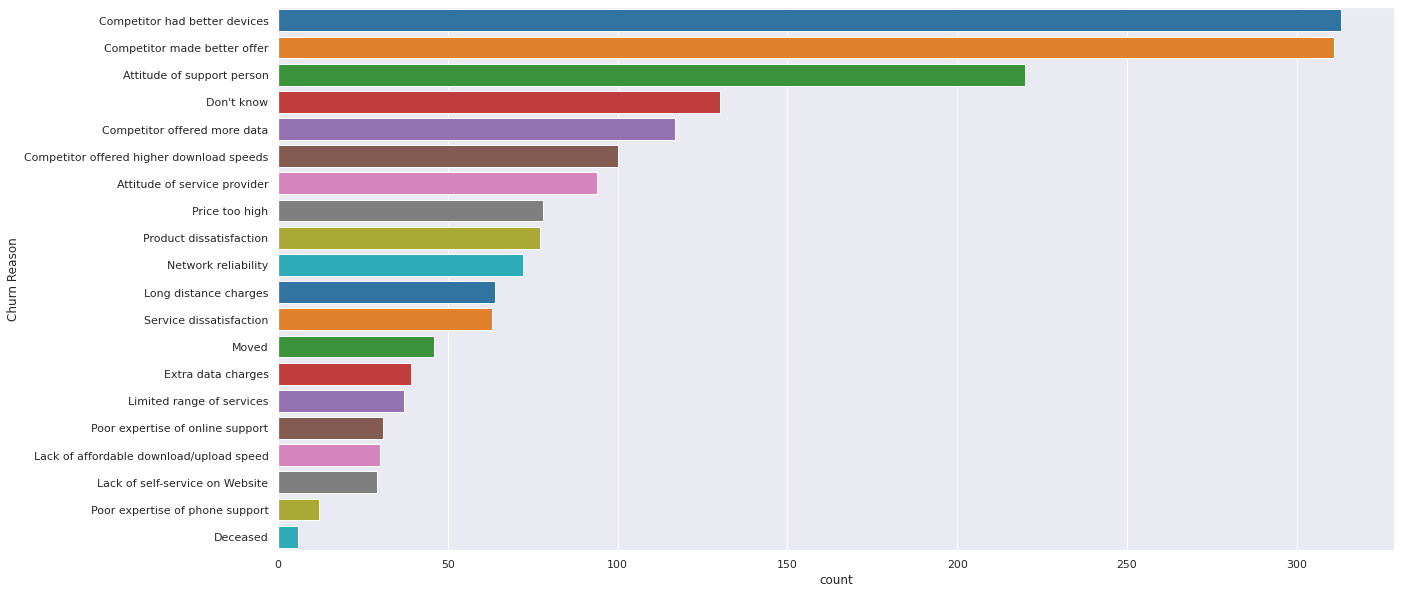

In [54]:
plt.figure(figsize=(20,10))
sns.countplot(y=df['Churn Reason'], palette='tab10',  order=df['Churn Reason'].value_counts().index)
plt.show()

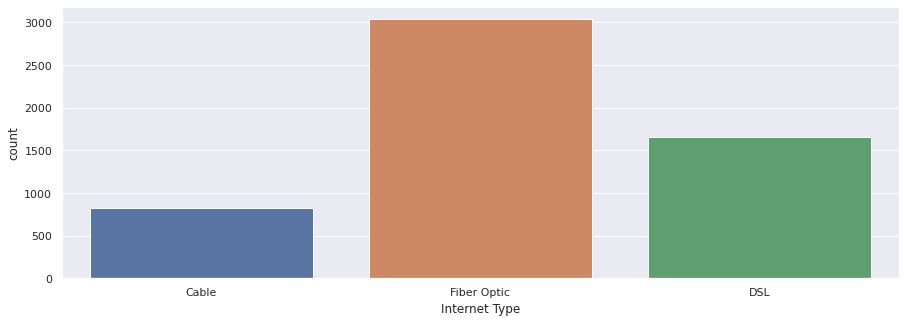

In [57]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df['Internet Type'])

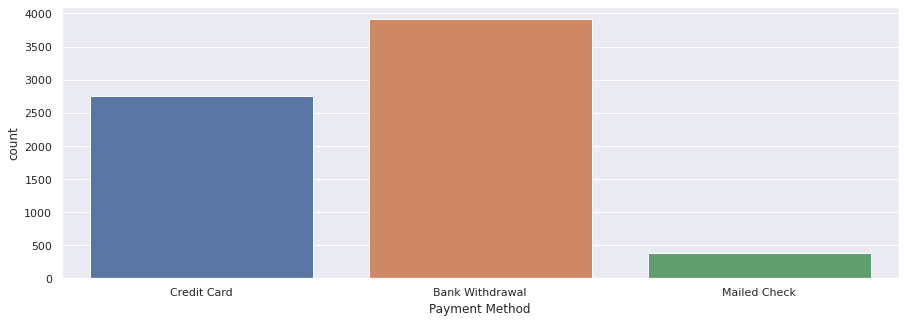

In [59]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df['Payment Method'])

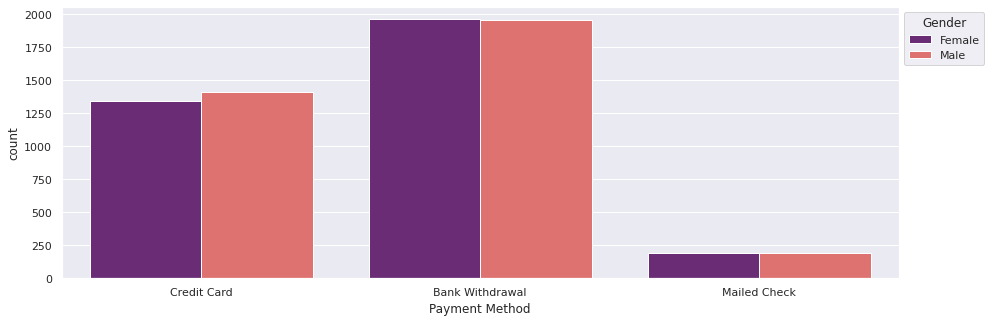

In [60]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 5))
ax=sns.countplot(x='Payment Method', data=df, hue='Gender' , palette="magma")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


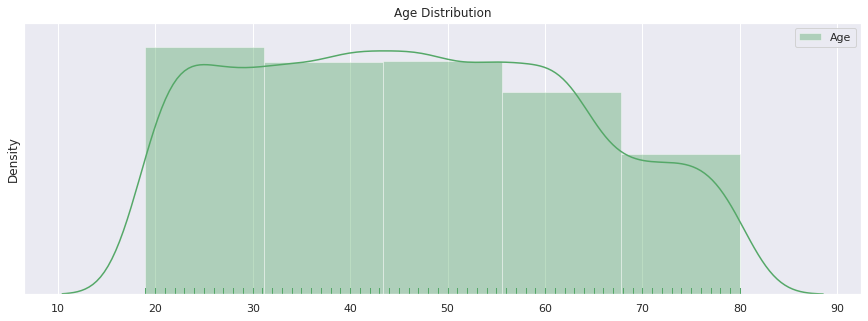

In [65]:
#Age distrubtion across the dataset
plt.figure(figsize=(15, 5))
sns.distplot(bins=5,x=df["Age"], label="Age",color="G",rug=True)
plt.yticks([])
plt.title("Age Distribution")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Age disribution across gender')

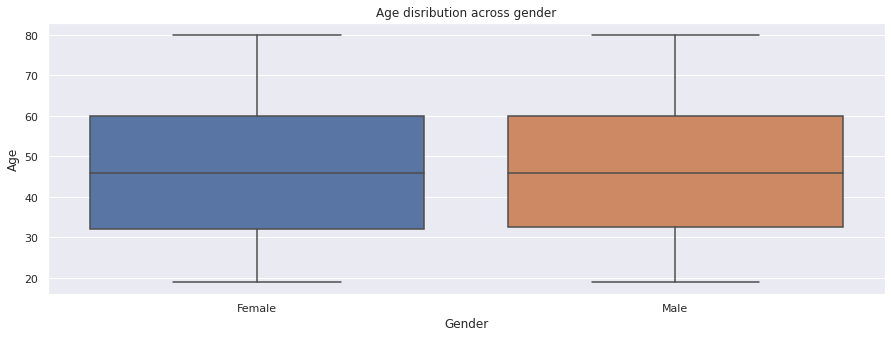

In [67]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 5))
ax = sns.boxplot(x=df["Gender"],y=df['Age'])
plt.title ('Age disribution across gender')

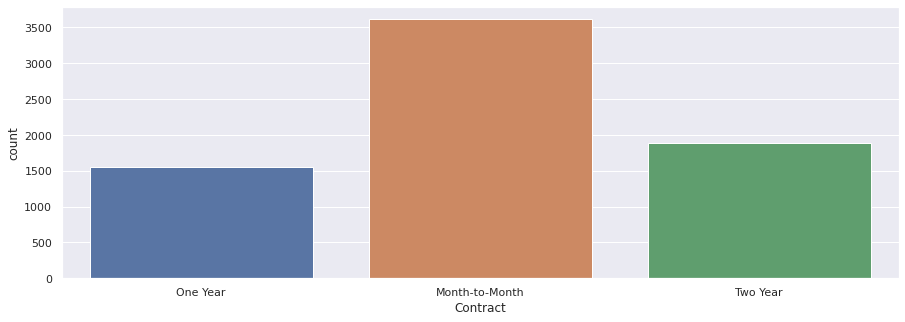

In [68]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df['Contract'])

In [70]:
df['City'].value_counts()

Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Johannesburg          2
South Lake Tahoe      2
Jacumba               2
Holtville             2
Eldridge              2
Name: City, Length: 1106, dtype: int64

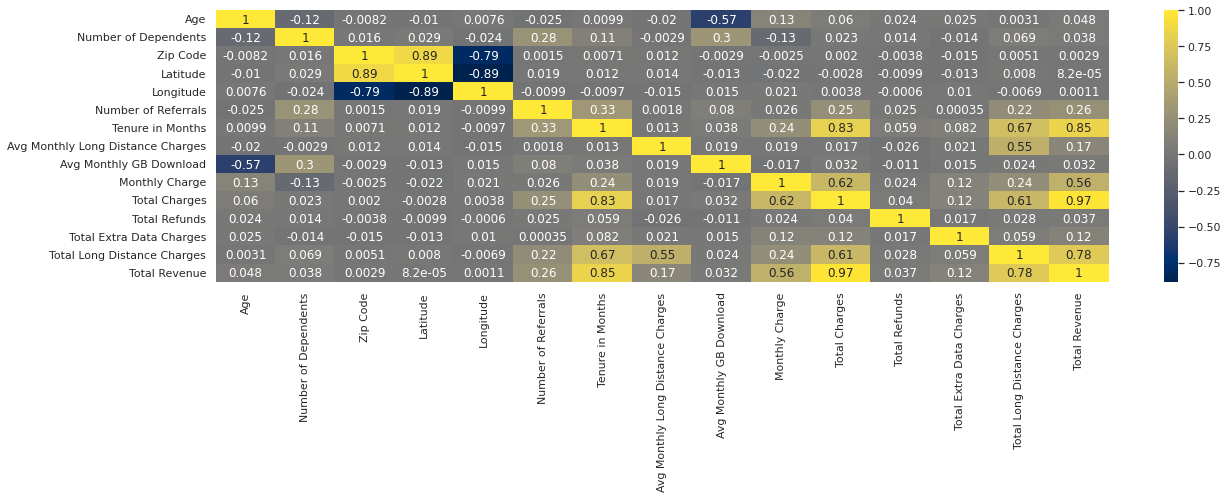

In [72]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr()  ,annot = True , cmap="cividis")

<Figure size 1080x720 with 0 Axes>

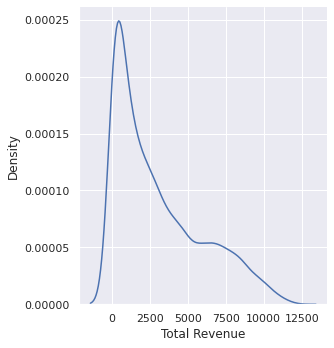

In [79]:
plt.figure(figsize = (15,10))
sns.displot(x=df['Total Revenue'],kind='kde')